# Assignment 1B: Basic Classification / Regression

Take the ODI dataset and load it. Alternatively, you can download a dataset of your own
choice from the web, and load that. If you opt for a downloaded dataset, write down
why that interests you, and why it is suited for classification/regression.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve
from sklearn.naive_bayes import CategoricalNB
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Initialize dataframe
df = pd.read_csv('./data/mushrooms.csv')
# Show first 5 rows
df.head()
# Class is indicative, p=poisonous and e=edible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
# Turn labels of each attribute into unique integers
for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
# Seperating attributes and label
X = df.iloc[:,1:23] 
y = df.iloc[:, 0]
X.head(), y.head()

(   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
 0          5            2          4        1     6                1   
 1          5            2          9        1     0                1   
 2          0            2          8        1     3                1   
 3          5            3          8        1     6                1   
 4          5            2          3        0     5                1   
 
    gill-spacing  gill-size  gill-color  stalk-shape  ...  \
 0             0          1           4            0  ...   
 1             0          0           4            0  ...   
 2             0          0           5            0  ...   
 3             0          1           5            0  ...   
 4             1          0           4            1  ...   
 
    stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
 0                         2                       7                       7   
 1                         2    

In [16]:
# Datasplit (cross-validation hold-out strategy)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
# DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

[Text(343.38461538461536, 1019.25, 'X[8] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(257.53846153846155, 883.35, 'entropy = 0.0\nsamples = 1373\nvalue = [0, 1373]'),
 Text(429.23076923076917, 883.35, 'X[19] <= 1.5\nentropy = 0.924\nsamples = 5126\nvalue = [3388, 1738]'),
 Text(171.69230769230768, 747.45, 'X[4] <= 3.5\nentropy = 0.331\nsamples = 1345\nvalue = [82, 1263]'),
 Text(85.84615384615384, 611.55, 'entropy = 0.0\nsamples = 1263\nvalue = [0, 1263]'),
 Text(257.53846153846155, 611.55, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(686.7692307692307, 747.45, 'X[7] <= 0.5\nentropy = 0.545\nsamples = 3781\nvalue = [3306, 475]'),
 Text(429.23076923076917, 611.55, 'X[19] <= 4.5\nentropy = 0.177\nsamples = 3187\nvalue = [3102, 85]'),
 Text(343.38461538461536, 475.65, 'entropy = 0.0\nsamples = 2634\nvalue = [2634, 0]'),
 Text(515.0769230769231, 475.65, 'X[10] <= 0.5\nentropy = 0.619\nsamples = 553\nvalue = [468, 85]'),
 Text(429.23076923076917, 339.75, 

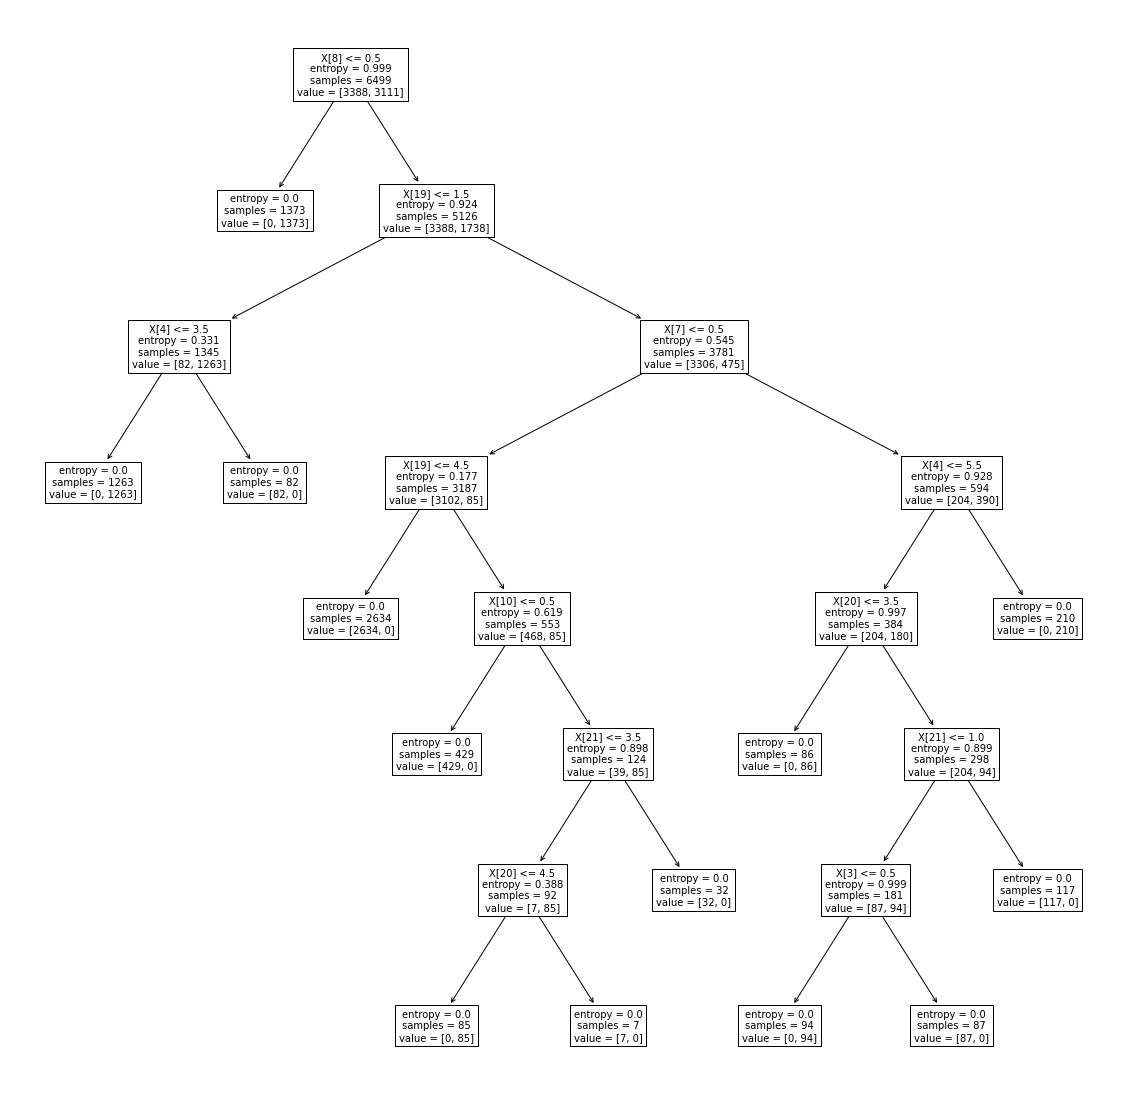

In [18]:
# Plot the tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=10)

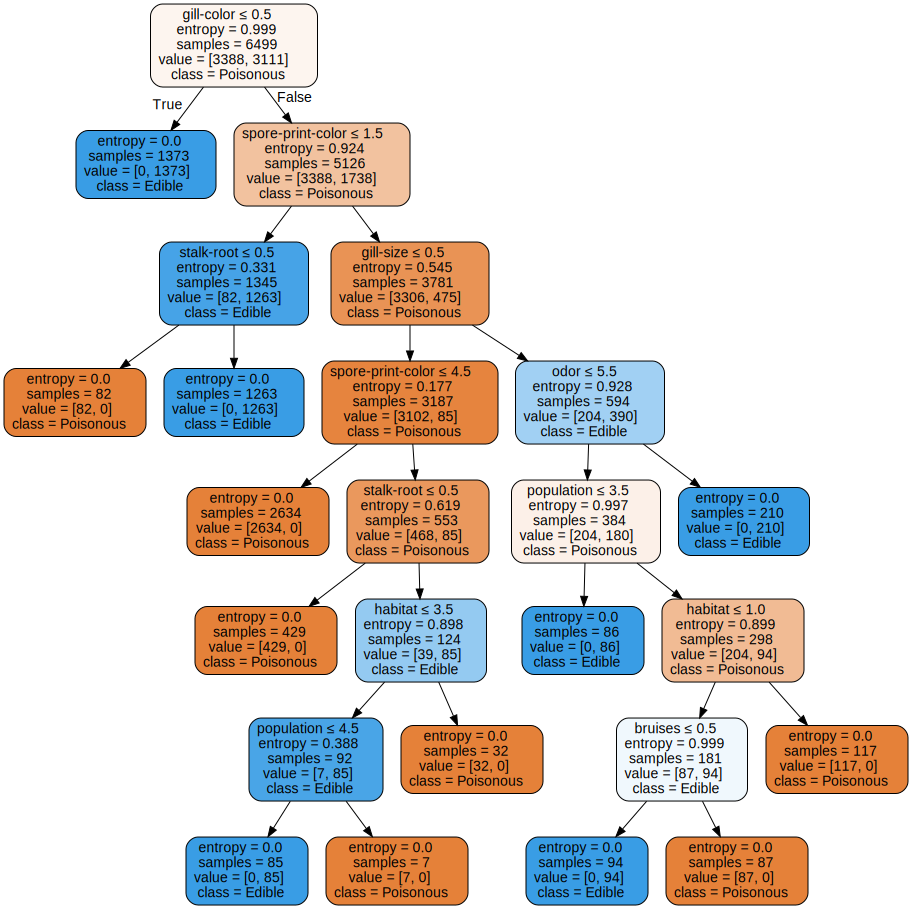

In [8]:
# Plot dot data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['Poisonous','Edible'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

DecisionTree
Misclassified samples: 0
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



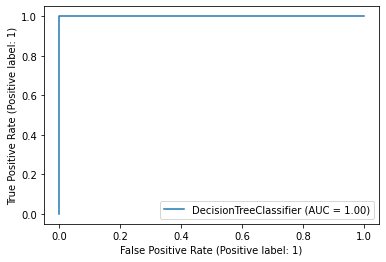

In [9]:
# Regression with DT, determine accuracy
y_predict_dt = clf.predict(X_test)
y_prob_pred_dt = clf.predict_proba(X_test)
# how did our model perform?
count_misclassified = (y_test != y_predict_dt).sum()

print("DecisionTree")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_predict_dt)
print('Accuracy: {:.2f}'.format(accuracy))

print(classification_report(y_test, y_predict_dt))
plot_roc_curve(clf, X_test, y_test)


In [10]:
# CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

Categorical Naive Bayes
Misclassified samples: 81
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       820
           1       1.00      0.90      0.95       805

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



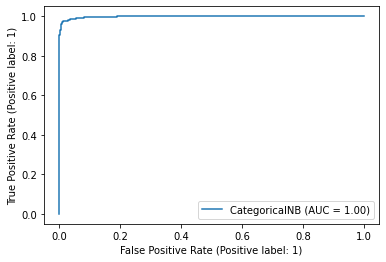

In [11]:
# Regression with Categorical Naive Bayes, determine accuracy
y_predict_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)
# how did our model perform?
count_misclassified = (y_test != y_predict_cnb).sum()

print("Categorical Naive Bayes")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_predict_cnb)
print('Accuracy: {:.2f}'.format(accuracy))

print(classification_report(y_test, y_predict_cnb))
plot_roc_curve(cnb, X_test, y_test)

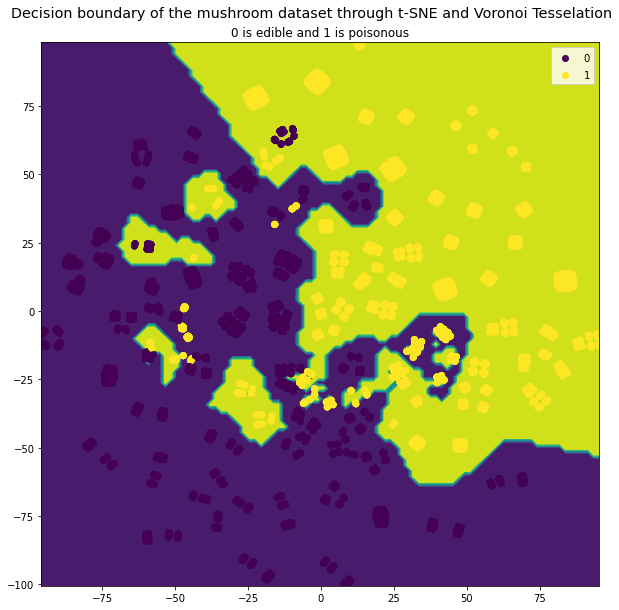

In [43]:
# Code from Aec Tm., https://stackoverflow.com/a/37917341
X_Train_embedded = TSNE(n_components=2).fit_transform(X)
model = LogisticRegression().fit(X,y)
y_predicted = model.predict(X)
# replace the above by your data and model

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.figure(figsize=(10,10))
plt.title('0 is edible and 1 is poisonous')
plt.contourf(xx, yy, voronoiBackground)
scatter = plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
plt.legend(*scatter.legend_elements())
plt.suptitle('Decision boundary of the mushroom dataset through t-SNE and Voronoi Tesselation', y=0.93, size='x-large')
plt.show()